# Aeromedical Flights: Dashboard & Forecasting

![ER_Diagram](..//images/ER_Diagram.png "ER Diagram")
<div align="center">ER Diagram</div>

In [1]:
# import libraries 
import pandas as pd
import numpy as np

## FAA_Airport_Data
___

In [2]:
FAA_Airport = pd.read_csv("..//Datasets/FAA_Airport_Data.csv")

In [3]:
FAA_Airport.head(10)

,FAA ID,AIRPORT NAME,LOCATION,ST,PROCEDURE NAME,LPV or LP,DA OR MDA,VIS,HAT,GPA,TCH,ILS to Rwy (Y/N),Rwy End Cntr,ILS @ Arpt (Y/N),ILS Arpt Cntr (Y/N),ILS CAT II or III,WAAS CHANNEL #
0,06N,RANDALL,MIDDLETOWN,NY,RNAV (GPS) RWY 26,LP,1020,1,497,NaN,NaN,N,1.0,N,N,NaN,40030
1,AST,ASTORIA RGNL,ASTORIA,OR,RNAV (GPS) RWY 08,LP,420,1,406,NaN,NaN,N,1.0,Y,Y,NaN,40032
2,C62,KENDALLVILLE MUNI,KENDALLVILLE,IN,RNAV (GPS) RWY 10,LP,1336,1,361,NaN,NaN,N,1.0,N,N,NaN,40035
3,K62,GENE SNYDER,FALMOUTH,KY,RNAV (GPS) RWY 21,LP,1340,1,455,NaN,NaN,N,1.0,N,N,NaN,40036
4,ORS,ORCAS ISLAND,EASTSOUND,WA,RNAV (GPS) RWY 16,LP,340,1,305,NaN,NaN,N,1.0,N,N,NaN,40038
5,ORS,ORCAS ISLAND,EASTSOUND,WA,RNAV (GPS) RWY 16,LP,400,1,365,NaN,NaN,N,1.0,N,NaN,NaN,40038
6,COS,CITY OF COLORADO SPRINGS MUNI,COLORADO SPRINGS,CO,RNAV (GPS) RWY 31,LP,6440,1,284,NaN,NaN,N,1.0,Y,Y,NaN,40040
7,67L,MESQUITE,MESQUITE,NV,RNAV (GPS) Y RWY 02,LP,4020,1 1/4,2084,NaN,NaN,N,1.0,N,N,NaN,40043
8,RRQ,ROCK RAPIDS MUNI,ROCK RAPIDS,IA,RNAV (GPS) RWY 34 AMDT 1,LP,1960,1,597,NaN,NaN,N,1.0,N,N,NaN,40044
9,GLS,SCHOLES INTL AT GALVESTON,GALVESTON,TX,RNAV (GPS) RWY 32,LP,340,1,335,NaN,NaN,N,1.0,Y,Y,NaN,40101


In [4]:
FAA_Airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FAA ID               4772 non-null   object 
 1   AIRPORT NAME         4772 non-null   object 
 2   LOCATION             4772 non-null   object 
 3   ST                   4772 non-null   object 
 4   PROCEDURE NAME       4772 non-null   object 
 5   LPV or LP            4772 non-null   object 
 6   DA OR MDA            4772 non-null   int64  
 7   VIS                  4772 non-null   object 
 8   HAT                  4772 non-null   int64  
 9   GPA                  4048 non-null   float64
 10  TCH                  4048 non-null   float64
 11  ILS to Rwy (Y/N)     4772 non-null   object 
 12  Rwy End Cntr         4728 non-null   float64
 13  ILS @ Arpt (Y/N)     4772 non-null   object 
 14  ILS Arpt Cntr (Y/N)  2217 non-null   object 
 15  ILS CAT II or III    187 non-null    o

0. FAA ID (Type: String)
1. __Airport Name__ (Type: String) – provides a name for a given airport, e.g., Randall
2. __Location__ (Type: String) – provides a name of the city where the airport is located, e.g., Middletown
3. __ST__ (Type: String) – Provides the state in which the airport is located, e.g., NY
4. __Procedure Name__ (Type: String) - Provides information about the area navigation (RNAV) procedure
5. __LPV or LP__ (Type: String) 
 1. [_Lateral Precision Performance with Vertical Guidance (LPV)_](https://www.skybrary.aero/index.php/Localiser_Performance_with_Vertical_Guidance_(LPV)) is defined as an Approach with Vertical Guidance (APV); that is, an instrument approach based on a navigation system that is not required to meet the precision approach standards of ICAO Annex 10 but that provides both course and glidepath deviation information.
 2. [_Localizer Performance without Vertical Guidance (LP)_](https://www.faa.gov/about/office_org/headquarters_offices/ato/service_units/techops/navservices/gnss/library/factsheets/media/RNAV_QFacts_final_06122012.pdf). LP minima are added in locations where terrain or obstructions do not allow publication of vertically guided LPV minima. Lateral sensitivity increases as an aircraft get closer to the runway (or point in space for helicopters). LP is not a fail-down mode for LPV; LP and LPV are independent. LNAV is not a fail-down mode for LP. LP will not be published with lines of minima that contain approved vertical guidance (i.e. LNAV/VNAV or LPV). 
6. __DA OR MDA__ (Type: Int) 
 1. [_Decision Altitude (DA)_](https://www.ifr-magazine.com/technique/decision-altitude-vs-minimum-descent-altitude/#:~:text=Yet%2C%20decision%20altitude%20(DA),lowest%20altitude%20allowed%20without%20visuals.&text=Without%20required%20flight%20visibility%20and,can't%20go%20below%20MDA.) or Decision Height (DH) is a specified altitude or height in the Precision Approach or approach with vertical guidance at which a Missed Approach must be initiated if the required visual reference to continue the approach has not been established.
 2. [_Minimum Descent Altitude (MDA)_](https://www.skybrary.aero/index.php/Minimum_Descent_Altitude/Height_(MDA/MDH) or Minimum Descent Height (MDH) is a specified altitude or height in a Non-Precision Approach or Circling Approach below which descent must not be made without the required visual reference. 
7. __VIS__ (Type: Decimal) - Vital Information System 
8. __HAT__ (Type: Int) - Height Above Touchdown  
9. __GPA__ (Type: Decimal) - [Glidepath Angle](http://dictionary.dauntless-soft.com/definitions/GroundSchoolFAA/GPA#:~:text=Request%20a%20Term-,GPA,vertical%20path%20angle%20(VPA).). The angular displacement of the vertical guidance path from a horizontal plane that passes through the reference datum point (RDP). This angle is published on approach charts (e.g., 3.00°, 3.20°, etc.). GPA is sometimes referred to as vertical path angle (VPA).
10. __TCH__ (Type: Int) - Threshold Crossing Height
11. __ILS to Rwy__ (Y/N) (Type: String) - Instrument Landing System to runway
12. __Rwy End Cntr__ (Type: Int) - Runway End Center
13. __ILS @ Arpt__ (Y/N) (Type: String) - Instrument Landing System at Airport
14. __ILS Arpt Cntr__ (Y/N) (Type: String) Instrument Landing System Airport Center
15. __ILS CAT II or III__ (Type: String) - Instrument Landing System categoty II or III
16. __WAAS CHANNEL #__ (Type: Int) - [Wide Area Augmentation System channel](https://www.faa.gov/about/office_org/headquarters_offices/ato/service_units/techops/navservices/gnss/waas/howitworks/#:~:text=Wide%20Area%20Augmentation%20System%20%2D%20How,Reference%20Stations%20(WRS)%20sites.&text=The%20messages%20are%20sent%20from,geostationary%20(GEO)%20communications%20satellites.)

## BTS_Airports_LAT_LON
___

In [5]:
airports_loc = pd.read_csv("..//Datasets/BTS_Airports_LAT_LON.csv")

In [6]:
airports_loc.head()

,AIRPORT_CODE,AIRPORT_NAME,CITY_NAME,COUNTRY_NAME,STATE_NAME,STATE_CODE,LATITUDE,LONGITUDE
0,01A,Afognak Lake Airport,Afognak Lake - AK,United States,Alaska,AK,58.109444,-152.906667
1,03A,Bear Creek Mining Strip,Granite Mountain - AK,United States,Alaska,AK,65.548056,-161.071667
2,04A,Lik Mining Camp,Lik - AK,United States,Alaska,AK,68.083333,-163.166667
3,05A,Little Squaw Airport,Little Squaw - AK,United States,Alaska,AK,67.570000,-148.183889
4,06A,Kizhuyak Bay,Kizhuyak - AK,United States,Alaska,AK,57.745278,-152.882778


In [7]:
airports_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AIRPORT_CODE  18207 non-null  object 
 1   AIRPORT_NAME  18207 non-null  object 
 2   CITY_NAME     18207 non-null  object 
 3   COUNTRY_NAME  18207 non-null  object 
 4   STATE_NAME    7934 non-null   object 
 5   STATE_CODE    7934 non-null   object 
 6   LATITUDE      18207 non-null  float64
 7   LONGITUDE     18207 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.1+ MB


0. __AIRPORT_CODE__ (Type: String) - The unique identification code given to recognize the airport. Ex: 01A
1. __AIRPORT_NAME__ (Type: String) - It represents the name given to the airport. Ex: Afognak Lake Airport
2. __CITY_NAME__ (Type: String) - This field shows the city in which the airport is located.Ex: Afognak Lake - AK
3. __COUNTRY_NAME__ (Type: String) - The countries in which the airports are located are listed under the COUNTRY_NAME attribute. Ex: United States
4. __STATE_NAME__ (Type: String) - The STATE_NAME attribute represents the airport's state. Ex: Alaska
5. __STATE_CODE__ (Type: String) - The state is identified with a unique code. Ex: AK
6. __LATITUDE__ (Type: Ratio) represents the airport location, which is measured at an angle up from the equator. Ex: 58.10944444
7. __LONGITUDE__ (Type: Ratio) represents the airport location, an angle from the prime meridian, measure to the east. Ex: -152.9066667

## MyFlightData
---
### Data cleaning and preprocessing 

In [8]:
my_flight = pd.read_csv("..//Datasets/MyFlightData.csv")

In [9]:
my_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13677 entries, 0 to 13676
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TailNumber           13677 non-null  object
 1   Origin_Airport_Name  13659 non-null  object
 2   Origin               13659 non-null  object
 3   Dest_Airport_Name    13659 non-null  object
 4   Destination          13659 non-null  object
 5   Departure            13677 non-null  object
 6   Arrival              13677 non-null  object
 7   Duration             13677 non-null  int64 
 8   Diverted             13677 non-null  bool  
 9   FWServiceName        13677 non-null  object
 10  ManufactureName      13677 non-null  object
 11  Model                13677 non-null  object
 12  State                13677 non-null  object
 13  NoFlightRecords      13677 non-null  bool  
dtypes: bool(2), int64(1), object(11)
memory usage: 1.3+ MB


In [10]:
my_flight.head()

,TailNumber,Origin_Airport_Name,Origin,Dest_Airport_Name,Destination,Departure,Arrival,Duration,Diverted,FWServiceName,ManufactureName,Model,State,NoFlightRecords
0,N111PV,Reno/Tahoe Intl,RNO,McCarran Intl,LAS,3/17/2020 11:08:00 PM,3/18/2020 12:28:00 AM,80,False,AIRMED INTERNATIONAL LLC,BEECH,200,Alabama,False
1,N111PV,McCarran Intl,LAS,Reno/Tahoe Intl,RNO,3/17/2020 8:04:00 PM,3/17/2020 9:23:00 PM,79,False,AIRMED INTERNATIONAL LLC,BEECH,200,Alabama,False
2,N111PV,San Jose Int'l,SJC,McCarran Intl,LAS,3/17/2020 3:13:00 PM,3/17/2020 4:47:00 PM,94,False,AIRMED INTERNATIONAL LLC,BEECH,200,Alabama,False
3,N111PV,McCarran Intl,LAS,San Jose Int'l,SJC,3/17/2020 11:16:00 AM,3/17/2020 12:55:00 PM,99,False,AIRMED INTERNATIONAL LLC,BEECH,200,Alabama,False
4,N111PV,San Francisco Intl,SFO,McCarran Intl,LAS,3/16/2020 2:09:00 AM,3/16/2020 3:44:00 AM,95,False,AIRMED INTERNATIONAL LLC,BEECH,200,Alabama,False


In [11]:
# Check count of null values
my_flight.isna().sum()

TailNumber              0
Origin_Airport_Name    18
Origin                 18
Dest_Airport_Name      18
Destination            18
Departure               0
Arrival                 0
Duration                0
Diverted                0
FWServiceName           0
ManufactureName         0
Model                   0
State                   0
NoFlightRecords         0
dtype: int64

In [12]:
# Let's drop null values. There are only 18 of them, so it does not greatly affect the analysis
my_flight = my_flight.dropna()

In [13]:
# Let's check any duplicates 
my_flight.duplicated().sum()

406

In [14]:
# Looks like that are not a lot of them. Let's drop them
my_flight = my_flight.drop_duplicates()

In [15]:
# Let's split "Departure" variable to date and time 
my_flight["Departure_date"] = my_flight.Departure.str.split(" ", n = 1, expand = True)[0]
my_flight["Departure_time"] = my_flight.Departure.str.split(" ", n = 1, expand = True)[1]

In [16]:
# Check new columns 
my_flight[["Departure","Departure_date", "Departure_time"]].head()

,Departure,Departure_date,Departure_time
0,3/17/2020 11:08:00 PM,3/17/2020,11:08:00 PM
1,3/17/2020 8:04:00 PM,3/17/2020,8:04:00 PM
2,3/17/2020 3:13:00 PM,3/17/2020,3:13:00 PM
3,3/17/2020 11:16:00 AM,3/17/2020,11:16:00 AM
4,3/16/2020 2:09:00 AM,3/16/2020,2:09:00 AM


Let's analyze flights that were canceled

In [17]:
cancel_flights = my_flight.query("Diverted == True")
cancel_flights.shape

(261, 16)

In [48]:
cancel_flights.FWServiceName.value_counts()

EagleMed LLC                                        29
LifeSave                                            23
Medway Air Ambulance                                14
Careflight (Sioux Falls)                            14
AirLink Critical Care Transport                     12
LifeMed Alaska                                      11
Black Hills Life Flight                             10
AIRMED INTERNATIONAL LLC                             8
Benefis Mercy Flight                                 8
PAFFORD AIR OF MISSISSIPPI LLC                       8
Survival Flight Inc.                                 8
Life Link III                                        7
PHI HEALTH LLC                                       7
AirLife Denver                                       7
MERCY FLIGHTS INC                                    7
Northeast Montana STAT Air Ambulance Cooperative     6
CALSTAR (California Shock Trauma Air Rescue)         6
Intermountain Life Flight (Utah)                     6
Air Idaho 

In [19]:
# At this point let's consider only performed flights
my_flight = my_flight.query("Diverted == False")

In [20]:
# convert Departure_date to datetime ignoring any error
my_flight.Departure_date = pd.to_datetime(my_flight.Departure_date, format='%m/%d/%Y', errors = 'coerce')

In [21]:
# Check count of null values in datetime
my_flight.isna().sum()

TailNumber              0
Origin_Airport_Name     0
Origin                  0
Dest_Airport_Name       0
Destination             0
Departure               0
Arrival                 0
Duration                0
Diverted                0
FWServiceName           0
ManufactureName         0
Model                   0
State                   0
NoFlightRecords         0
Departure_date         14
Departure_time          0
dtype: int64

In [22]:
# Looks like there are 14 dates with unappropriate formating. Let's drop it
my_flight = my_flight.dropna()

In [23]:
# Check datetime column
my_flight[["Departure","Departure_date"]].head()

,Departure,Departure_date
0,3/17/2020 11:08:00 PM,2020-03-17
1,3/17/2020 8:04:00 PM,2020-03-17
2,3/17/2020 3:13:00 PM,2020-03-17
3,3/17/2020 11:16:00 AM,2020-03-17
4,3/16/2020 2:09:00 AM,2020-03-16


In [24]:
# Let's figure out the date rage of our dataset with which we will deal
print("From", my_flight.Departure_date.dt.date.min(), "to", my_flight.Departure_date.dt.date.max())

From 2019-12-23 to 2020-04-08


### Air Medical Services Exploratory Analysis
Now, when we removed all null values, duplicates and converted date to time series, it's time to analyze air medical services!

In [25]:
# Let's obversve the names of unique Air Medical Services
pd.DataFrame(my_flight.FWServiceName.unique(), columns=['Air Medical service'])

,Air Medical service
0,AIRMED INTERNATIONAL LLC
1,UNIVERSITY OF ALABAMA BOARD OF TRUSTEES
2,LifeMed Alaska
3,Native Air Ambulance
4,Survival Flight Inc.
5,Aero Med Express
6,Airborne Air Ambulance
7,PHI HEALTH LLC
8,CALSTAR (California Shock Trauma Air Rescue)
9,DESERT AIR AMBULANCE INC


So, the dataset represents the flight data of __56__ unique Air Medical services from 2019-12-23 to 2020-04-08. Some of them have several aircrafts with tail numbers. Let's count them!

In [26]:
pd.DataFrame(my_flight.groupby("FWServiceName").TailNumber.nunique().sort_values(ascending=False)).head(10)

,TailNumber
FWServiceName,
PHOENIX AIR GROUP INC,11
EagleMed LLC,10
LifeMed Alaska,10
Jet Air Inc.,9
LifeSave,9
AIRMED INTERNATIONAL LLC,7
Medway Air Ambulance,5
PHI HEALTH LLC,5
Northeast Montana STAT Air Ambulance Cooperative,3


There are 8 air medical services that have more than 3 aircrafts. 

Let's figure out which service performed more flights during this period:

In [27]:
pd.DataFrame(my_flight.FWServiceName.value_counts()).rename(columns={"FWServiceName":"Number of Services"})

,Number of Services
EagleMed LLC,1298
LifeSave,1146
LifeMed Alaska,791
AirLink Critical Care Transport,617
Medway Air Ambulance,605
PHI HEALTH LLC,530
AIRMED INTERNATIONAL LLC,524
Careflight (Sioux Falls),501
Jet Air Inc.,413
Intermountain Life Flight (Utah),334


Wow! Looks like "EagleMed LLC" and "LifeSave" were in huge demand in this period! The question is where?0_o

The "MyFlightData" data has information about Airports. Let's analyze "EagleMed LLC" destinations first:

In [28]:
EagleMed = my_flight.query("FWServiceName == 'EagleMed LLC'")
EagleMed_airport_dep = pd.DataFrame(EagleMed[["Origin", "Origin_Airport_Name"]].value_counts(), columns=["Number of Departure Flights"])

print("shape:", EagleMed_airport_dep.shape)
EagleMed_airport_dep.head(10)

shape: (185, 1)


,,Number of Departure Flights
Origin,Origin_Airport_Name,
LBB,Lubbock Smith Intl,119
ICT,Wichita Eisenhower,114
SJT,San Angelo Rgnl,94
GLD,Goodland Municipal,91
AMA,Amarillo Intl,77
APA,Centennial,64
DAL,Dallas Love Field,56
FTW,Fort Worth Meacham Intl,35
POF,Poplar Bluff Muni,35


According to the table below, "EagleMed LLC" flew from 186 airports to different destinations. The top 3 used airports are Lubbock Smith Intl, Wichita Eisenhower, and San Angelo Rgnl.

The most popular final destinations:

In [29]:
EagleMed_airport_arr = pd.DataFrame(EagleMed[["Destination", "Dest_Airport_Name"]].value_counts(), columns=["Number of Arrival Flights"])

print("shape:", EagleMed_airport_arr.shape)
EagleMed_airport_arr.head(10)

shape: (172, 1)


,,Number of Arrival Flights
Destination,Dest_Airport_Name,
LBB,Lubbock Smith Intl,127
ICT,Wichita Eisenhower,123
GLD,Goodland Municipal,113
SJT,San Angelo Rgnl,103
AMA,Amarillo Intl,82
APA,Centennial,55
DAL,Dallas Love Field,48
POF,Poplar Bluff Muni,37
FTW,Fort Worth Meacham Intl,33


You probably noticed that the tables of the frequently used airport for departure and arrival almost the same. How is it possible? The reason is that after all medical services aircraft needs come back to the hangar. Not the most optimal solution, but we hope that our analysis will help to solve this problem.

Nevertheless, the airport names don't give any useful information about aircraft moving. Fortunately, we have __"BTS_Airports_LAT_LON"__ that contains information about airport location, such as state, city, latitude, and longitude. Only what we need is just to merge these two datasets...

In [30]:
# split city name and state bacause we have already
airports_loc["CITY_NAME"] = airports_loc.CITY_NAME.str.split("-", n = 1, expand = True)[0]
airports_loc.head()

,AIRPORT_CODE,AIRPORT_NAME,CITY_NAME,COUNTRY_NAME,STATE_NAME,STATE_CODE,LATITUDE,LONGITUDE
0,01A,Afognak Lake Airport,Afognak Lake,United States,Alaska,AK,58.109444,-152.906667
1,03A,Bear Creek Mining Strip,Granite Mountain,United States,Alaska,AK,65.548056,-161.071667
2,04A,Lik Mining Camp,Lik,United States,Alaska,AK,68.083333,-163.166667
3,05A,Little Squaw Airport,Little Squaw,United States,Alaska,AK,67.570000,-148.183889
4,06A,Kizhuyak Bay,Kizhuyak,United States,Alaska,AK,57.745278,-152.882778


In [31]:
# drop null values
airports_loc = airports_loc.dropna()

In [32]:
# drop duplicates
airports_loc = airports_loc.drop_duplicates()

In [33]:
# subset data for US
airports_loc = airports_loc.query("COUNTRY_NAME == 'United States'")

In [34]:
EagleMed.merge(airports_loc.drop_duplicates(subset=['AIRPORT_CODE']), how='left', left_on='Origin', right_on='AIRPORT_CODE').head()

,TailNumber,Origin_Airport_Name,Origin,Dest_Airport_Name,Destination,Departure,Arrival,Duration,Diverted,FWServiceName,...,Departure_date,Departure_time,AIRPORT_CODE,AIRPORT_NAME,CITY_NAME,COUNTRY_NAME,STATE_NAME,STATE_CODE,LATITUDE,LONGITUDE
0,N53AR,Anchorage Intl,ANC,Sitka Rocky Gutierrez,ASI,3/22/2020 1:43:00 AM,3/22/2020 3:46:00 AM,123,False,EagleMed LLC,...,2020-03-22,1:43:00 AM,ANC,Anchorage International,Anchorage,United States,Alaska,AK,61.169167,-149.985278
1,N53AR,Sitka Rocky Gutierrez,ASI,Anchorage Intl,ANC,3/21/2020 9:09:00 PM,3/21/2020 11:47:00 PM,158,False,EagleMed LLC,...,2020-03-21,9:09:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N53AR,Kake,AFE,Sitka Rocky Gutierrez,ASI,3/21/2020 3:37:00 AM,3/21/2020 4:03:00 AM,26,False,EagleMed LLC,...,2020-03-21,3:37:00 AM,AFE,Kake Airport,Kake,United States,Alaska,AK,56.961362,-133.910261
3,N53AR,Sitka Rocky Gutierrez,ASI,Kake,AFE,3/21/2020 2:52:00 AM,3/21/2020 3:12:00 AM,20,False,EagleMed LLC,...,2020-03-21,2:52:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N53AR,Ketchikan Intl,AKT,Sitka Rocky Gutierrez,ASI,3/20/2020 10:19:00 PM,3/20/2020 11:15:00 PM,56,False,EagleMed LLC,...,2020-03-20,10:19:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately, performing left join, we faced with null values and don't have any information about the airport in __"BTS_Airports_LAT_LON"__ dataset.

In [35]:
EagleMed_airport_loc = EagleMed.merge(airports_loc.drop_duplicates(subset=['AIRPORT_CODE']), how='inner', left_on='Origin', right_on='AIRPORT_CODE')

In [36]:
print("Performing the inner join, we lost", EagleMed.shape[0] - EagleMed_airport_loc.shape[0], "rows.")

Performing the inner join, we lost 37 rows.


In [37]:
pd.DataFrame(EagleMed_airport_loc.groupby('STATE_NAME').CITY_NAME.value_counts()).rename({'CITY_NAME':'Number of Departure Flights'}, axis=1).sort_values(by='Number of Departure Flights', ascending=False)

,,Number of Departure Flights
STATE_NAME,CITY_NAME,
Texas,Lubbock,119
Kansas,Wichita,114
Texas,San Angelo,94
Kansas,Goodland,91
Texas,Amarillo,77
...,...,...
Georgia,Tifton,1
Ohio,Columbus,1
North Carolina,Raleigh/Durham,1


Now we have the location of each departure flight. The frequent city that "EagleMed" LLC departure from is __Lubbock__. In this case, the best and easiest way to visualize it is to use Tableau, performing the same merging.

to be continued in Tableau...

Using Tableau we can visualize "EagleMed" LLC departure flights from Lubbock Smith Int airport, which located in Lubbock city. Now we can see all destinations and the __average duration__ of the flight.

![ER_Diagram](..//images/Lubbock_Smith_Int.png "ER Diagram")

### Flight Analysis
Let's perform our first time series analysis with the number of flight for each day

In [38]:
# count number of flight for each departure day
num_flights = pd.DataFrame(my_flight.Departure_date.value_counts()).sort_index()
num_flights.head()

,Departure_date
2019-12-23,26
2019-12-24,82
2019-12-25,90
2019-12-26,73
2019-12-27,101


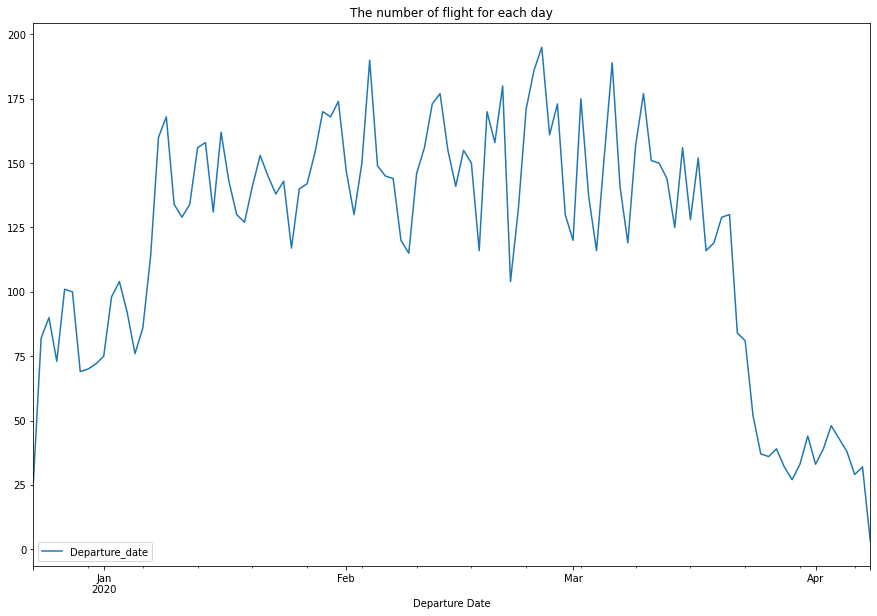

In [40]:
# Let's visualize the number of flight for each day
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
num_flights.plot(ax=ax)
plt.title("The number of flight for each day")
plt.xlabel("Departure Date")
plt.legend(loc = "lower left")
plt.show()

It is an interesting observation. The number of flight for each day dropped dramatically from mid-March to the end of the month. 
Let's figure out what's going on (Hint: COVID-19).
The beginning of the average flight duration decreasing corresponds with the first day of Stay at Home Order (Mar 19, 2020). 
Source: https://www.timeanddate.com/holidays/us/lockdown-day-1. 

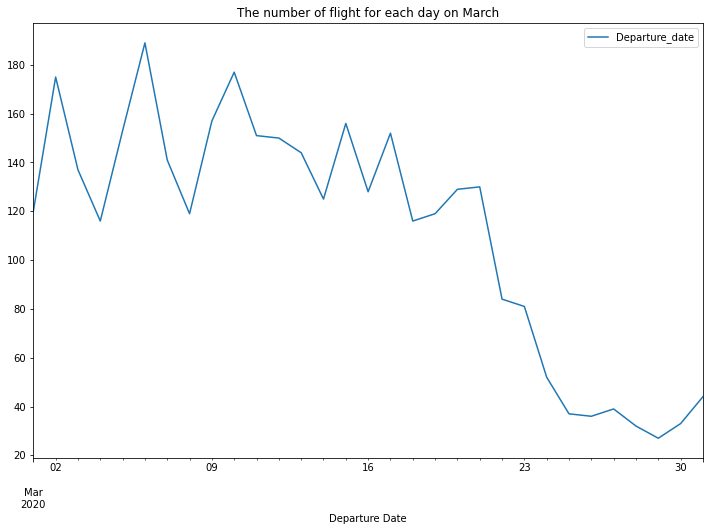

In [41]:
# Look closer to the March
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
num_flights.loc["2020-03"].plot(ax=ax)
plt.title("The number of flight for each day on March")
plt.xlabel("Departure Date")
plt.show()

At this point, we'll consider our dataset BEFORE and AFTER COVID-19 occurrence in term of finding some pattern and how it affects flights.

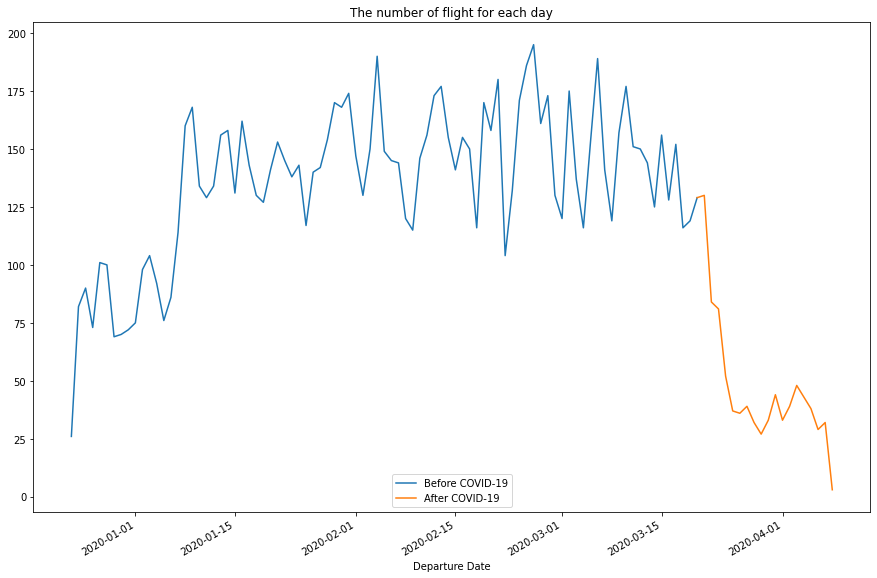

In [42]:
# Splitting point will be the day after first lockdown annoncement (Mar 20, 2020)
before_covid = num_flights.loc[:"2020-03-20"]
after_covid = num_flights.loc['2020-03-20':]

# Plot Before and after 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.plot(before_covid.index, before_covid, label='Before COVID-19')
plt.plot(after_covid.index, after_covid, label='After COVID-19')
plt.title("The number of flight for each day")
plt.xlabel("Departure Date")
plt.legend(loc = 'lower center')
fig.autofmt_xdate()
plt.show()

Now, let's analyze flight duration!

In [43]:
# create new set with duration
duration = my_flight.set_index("Departure_date").Duration

# Group by day and take average of flight duration 
avg_duration = duration.groupby("Departure_date").mean()
avg_duration.head()

Departure_date
2019-12-23    43.076923
2019-12-24    41.756098
2019-12-25    49.622222
2019-12-26    50.945205
2019-12-27    61.306931
Name: Duration, dtype: float64

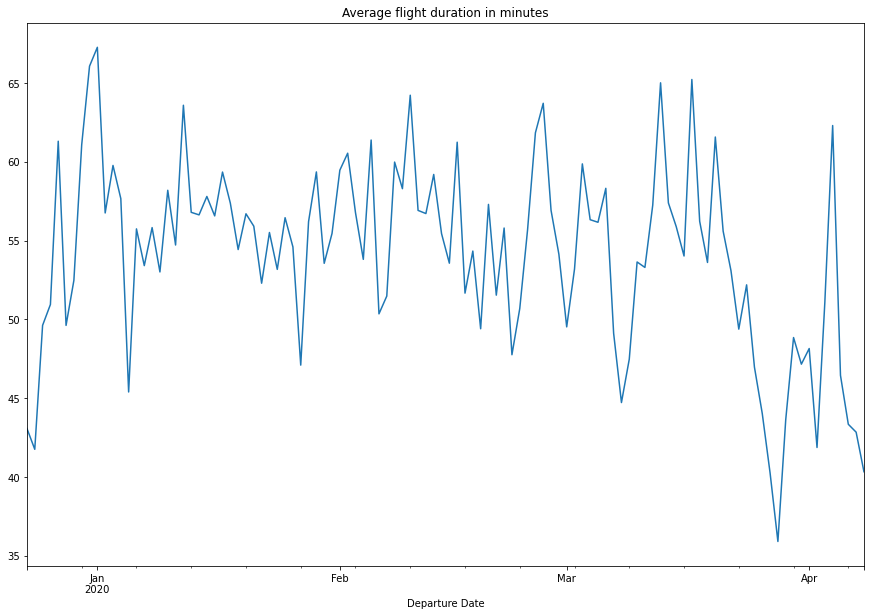

In [44]:
# Let's visualize the average duration
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
avg_duration.plot(ax=ax)
plt.title("Average flight duration in minutes")
plt.xlabel("Departure Date")
plt.show()

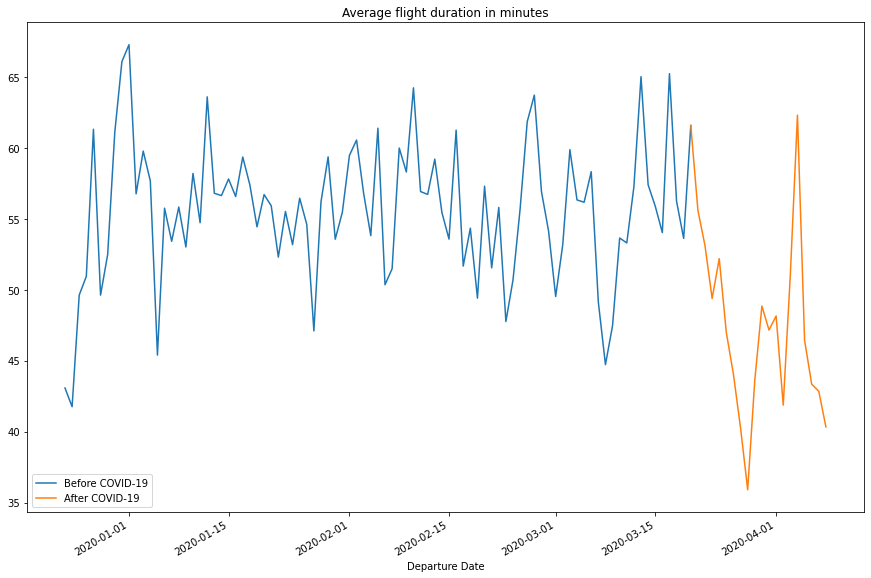

In [45]:
# Split to Before and After 
before_covid = avg_duration.loc[:"2020-03-20"]
after_covid = avg_duration.loc['2020-03-20':]

# Plot Before and After 
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.plot(before_covid.index, before_covid, label='Before COVID-19')
plt.plot(after_covid.index, after_covid, label='After COVID-19')
plt.title("Average flight duration in minutes")
plt.xlabel("Departure Date")
plt.legend(loc = 'lower left')
fig.autofmt_xdate()
plt.show()

Hmm... The average flight duration was also decreased rapidly after Covid-19, but then in April, it comes back to normal. Looks like the distance of the flight increased.

## Flights Forecasting 
---

# Tail_Number
---

In [50]:
# Load xlsx dataset
Tail_Number = pd.ExcelFile("..//Datasets/Tail_Number.xlsx", engine='openpyxl')

In [51]:
# excel content
Tail_Number.sheet_names

['List', 'Data']

In [52]:
# Extract "Data" sheet
Tail = Tail_Number.parse(1)

In [53]:
Tail.head()

,TailNumber,Date,Aircraft,Origin Name,Origin Code,Destination Name,Destination Code,Departure,Arrival,Duration,Note1,Note2
0,N111PV,2020-03-17,BE20,Reno/Tahoe Intl,KRNO,McCarran Intl,KLAS,09:08PM PDT,10:28PM PDT,01:20:00,NaN,NaN
1,N111PV,2020-03-17,BE20,McCarran Intl,KLAS,Reno/Tahoe Intl,KRNO,06:04PM PDT,07:24PM PDT,01:19:00,NaN,NaN
2,N111PV,2020-03-17,BE20,San Jose Int'l,KSJC,McCarran Intl,KLAS,01:13PM PDT,02:48PM PDT,01:34:00,NaN,NaN
3,N111PV,2020-03-17,BE20,McCarran Intl,KLAS,San Jose Int'l,KSJC,09:16AM PDT,10:55AM PDT,01:39:00,NaN,NaN
4,N111PV,2020-03-16,BE20,San Francisco Intl,KSFO,McCarran Intl,KLAS,12:09AM PDT,01:44AM PDT,01:35:00,NaN,NaN


In [54]:
# drop useless variables
Tail = Tail.drop(['Note1', 'Note2'], axis=1)

In [55]:
# Check count of null values
Tail.isna().sum()

TailNumber            0
Date                 56
Aircraft             56
Origin Name          58
Origin Code         101
Destination Name     56
Destination Code     57
Departure            56
Arrival             381
Duration             58
dtype: int64

In [56]:
# Let's drop null values
Tail = Tail.dropna()

In [57]:
# Check count of duplicated values
Tail.duplicated().sum()

82

In [58]:
# Let's drop them
tail_num = Tail.drop_duplicates()

In [59]:
tail_num.head()

,TailNumber,Date,Aircraft,Origin Name,Origin Code,Destination Name,Destination Code,Departure,Arrival,Duration
0,N111PV,2020-03-17,BE20,Reno/Tahoe Intl,KRNO,McCarran Intl,KLAS,09:08PM PDT,10:28PM PDT,01:20:00
1,N111PV,2020-03-17,BE20,McCarran Intl,KLAS,Reno/Tahoe Intl,KRNO,06:04PM PDT,07:24PM PDT,01:19:00
2,N111PV,2020-03-17,BE20,San Jose Int'l,KSJC,McCarran Intl,KLAS,01:13PM PDT,02:48PM PDT,01:34:00
3,N111PV,2020-03-17,BE20,McCarran Intl,KLAS,San Jose Int'l,KSJC,09:16AM PDT,10:55AM PDT,01:39:00
4,N111PV,2020-03-16,BE20,San Francisco Intl,KSFO,McCarran Intl,KLAS,12:09AM PDT,01:44AM PDT,01:35:00


In [66]:
print("The Tail_Number dataset has", tail_num.shape[0] - my_flight.shape[0], "more observations than cleaned MyFlightData")

The Tail_Number dataset has 2426 more observations than cleaned MyFlightData


(12978, 16)